In [1]:
import pandas as pd
import numpy as np
import random
import scipy.stats
import math
import seaborn as sns
from matplotlib import pyplot as plt
from random import sample
from scipy.stats import chisquare
from scipy.stats import geom
from scipy.stats import t
from scipy import stats
z90 = 1.645
z95 = 1.96
z99 = 2.576
%matplotlib inline

CONFIDENCE INTERVAL
a) standard error = 1.9535, me = 4.5048, dof = 8, t_conf = 2.3060
b) we're 95% confident that
is between 3.3252 and 12.3348
c) .


C:\Program Files (x86)\Anaconda3\lib\site-packages\matplotlib\patches.py:121: UserWarning: Setting the 'color' property will overridethe edgecolor or facecolor properties. 
  warnings.warn("Setting the 'color' property will override"


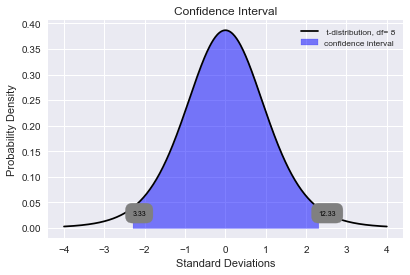

In [21]:
# confidence interval for a difference of means
# example 7.21

# ESCs
n1 = 9
xbar1 = 3.50
s1 = 5.17
# control
n2 = 9
xbar2 = -4.33
s2 = 2.76
n = 9

xbar = xbar1 - xbar2
cl = .95
sl = 1-cl
dof = n-1

# CONFIDENCE INTERVAL
fig = plt.figure(figsize=(14,4))
x = np.linspace(-4, 4, 500)
s1t = sl / 2
t_conf = stats.t.ppf(1-s1t, dof) # upper tail is 1 - confidence level /2 (one tail)
se = np.sqrt((s1**2/n1) +(s2**2/n2))  
me = t_conf * se
lo = xbar - me
hi = xbar + me
print('''CONFIDENCE INTERVAL
a) standard error = {se:.4f}, me = {me:.4f}, dof = {dof}, t_conf = {t_conf:.4f}
b) we're {cl:.0%} confident that
is between {lo:.4f} and {hi:.4f}
c) .'''
.format(cl=cl,se=se,me=me,lo=lo,hi=hi,dof=dof,t_conf=t_conf))

ax_conf = fig.add_subplot(1,2,2)
y = stats.t.pdf(x, dof)
two_t_conf = [t_conf, (t_conf)*-1]

ax_conf.plot(x, y, color='black',label=f' t-distribution, df= {dof}'.format(df=dof))
ax_conf.fill_between(x, y, color='blue', alpha=0.5, where= ~((x<min(two_t_conf)) | (x>max(two_t_conf))) ,label="confidence interval")
ax_conf.set_ylabel('Probability Density')
ax_conf.set_xlabel('Standard Deviations')
ax_conf.set_title('Confidence Interval')
ax_conf.text(min(two_t_conf), stats.t.cdf(x=min(two_t_conf), df=dof), '{t_lo:.2f}'.format(t_lo=lo), color='black', 
        bbox=dict(facecolor='none', edgecolor='black', boxstyle='round,pad=1', color='gray'),fontsize='x-small')
ax_conf.text(max(two_t_conf), stats.t.cdf(x=min(two_t_conf), df=dof), '{t_hi:.2f}'.format(t_hi=hi), color='black', 
        bbox=dict(facecolor='none', edgecolor='black', boxstyle='round,pad=1', color='gray'),fontsize='x-small')
legend = ax_conf.legend(shadow=True,fontsize='small')

1.9535295692099921

1.8595480375228424